# 9 Jewels of Warners Bros

In [32]:
import pandas as pd

# Load your data into a DataFrame (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('/Users/aditya/Desktop/Class/MGMT635 DM&A/Finalterm/IMDB_9JEWELS.csv')

# Drop the default index column
df = df.drop(df.columns[0], axis=1)



# Display the top 5 AND Data Type
#print(df.head())
#print(df.dtypes)


# Convert 'Budget' and 'Worldwide Gross' columns to numeric values if they are not already
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Worldwide Gross'] = pd.to_numeric(df['Worldwide Gross'], errors='coerce')

# Calculate the 'Budget to Worldwide Gross Ratio'
df['Profit_index'] = df['Budget'] / df['Worldwide Gross']

# Display the DataFrame including the new column
#print(df.head())

# Assign weights to each criterion
weights = {
    'awards': 2,
    'oscar wins': 4,
    'Opening Weekend Gross': 1,
    'US & Canada Gross': 1,
    'Worldwide Gross': 4,
    'Profit_index': 3  # Updated column name
}

# Calculate the Total Score
df['Total_Score'] = sum(df[col] * weights[col] for col in weights)

# Rank Directors based on Total Score
df['Rank'] = df['Total_Score'].rank(ascending=False, method='min')

all_directors_lifetime_performance = df.groupby(['Director 1']).agg({
    'Total_Score': 'sum',
    'Profit_index': 'sum',
    'Rank': 'min',  # Assuming you want to keep the minimum rank if directors appear multiple times
    'awards': 'sum',
    'oscar wins': 'sum',
    'Opening Weekend Gross': 'sum',
    'US & Canada Gross': 'sum',
    'Worldwide Gross': 'sum'
}).reset_index()

# Sort the all_directors_lifetime_performance DataFrame by Rank in increasing order
sorted_all_directors_lifetime_performance = all_directors_lifetime_performance.sort_values(by='Rank')

# Display all columns for the sorted information of all directors with lifetime performance
print(sorted_all_directors_lifetime_performance)



               Director 1   Total_Score  Profit_index  Rank  awards  \
1026        James Cameron  2.231898e+10      0.169372   1.0     216   
156         Anthony Russo  2.157652e+10      3.159403   2.0     116   
873          Greta Gerwig  6.565429e+09      0.069358   5.0      11   
1831        Peter Jackson  2.601673e+10      0.955298   6.0     510   
1052            James Wan  8.836116e+09      1.502499   7.0      26   
...                   ...           ...           ...   ...     ...   
2496  Álvaro Díaz Lorenzo  0.000000e+00      0.000000   NaN       0   
2497          Éric Rohmer  0.000000e+00      0.000000   NaN       9   
2498     Ömer Faruk Sorak  0.000000e+00      3.080948   NaN       0   
2499           Ömer Vargi  0.000000e+00      0.000000   NaN       2   
2500          Özcan Deniz  0.000000e+00      2.456689   NaN       0   

      oscar wins  Opening Weekend Gross  US & Canada Gross  Worldwide Gross  
1026          14            105663612.0       1.459514e+09     5.1884

             Director 1   Total_Score  Profit_index  Rank  awards  oscar wins  \
1026      James Cameron  2.231898e+10      0.169372   1.0     216          14   
156       Anthony Russo  2.157652e+10      3.159403   2.0     116           0   
873        Greta Gerwig  6.565429e+09      0.069358   5.0      11           0   
1831      Peter Jackson  2.601673e+10      0.955298   6.0     510          17   
1052          James Wan  8.836116e+09      1.502499   7.0      26           0   
1233          Jon Watts  8.982720e+09      0.340178   8.0      18           0   
398   Christopher Nolan  2.102856e+10      1.940960   9.0     529          11   
1590        Michael Bay  5.461718e+09      0.963455  11.0       5           0   
2320      Todd Phillips  1.301425e+10      1.205726  12.0     144           2   

      Opening Weekend Gross  US & Canada Gross  Worldwide Gross  
1026            105663612.0       1.459514e+09     5.188449e+09  
156             614888370.0       1.537525e+09     4.8560

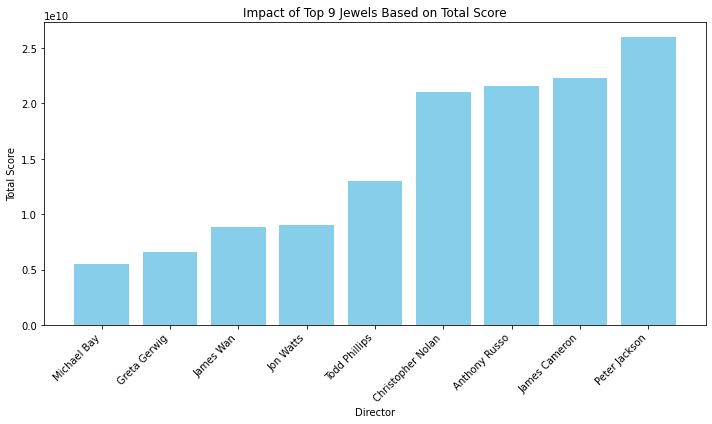

In [35]:
# Sort the all_directors_lifetime_performance DataFrame by Rank in increasing order
sorted_all_directors_lifetime_performance = all_directors_lifetime_performance.sort_values(by='Rank')

# Identify the Top 9 Directors based on Rank in increasing order
top_9_directors = sorted_all_directors_lifetime_performance.head(9)

# Display the information of the top 9 directors with lifetime performance (all columns)
print(top_9_directors)
import matplotlib.pyplot as plt

# Assuming 'Total_Score' is the column containing the Total Score in your DataFrame
impact_data = top_9_directors[['Director 1', 'Total_Score']]

# Sort impact_data by Total_Score in increasing order
impact_data = impact_data.sort_values(by='Total_Score')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(impact_data['Director 1'], impact_data['Total_Score'], color='skyblue')
plt.title('Impact of Top 9 Jewels Based on Total Score')
plt.xlabel('Director')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# YEAR VS AVG 'Opening Weekend Gross', 'US & Canada Gross', 'Worldwide Gross'

<Figure size 720x360 with 0 Axes>

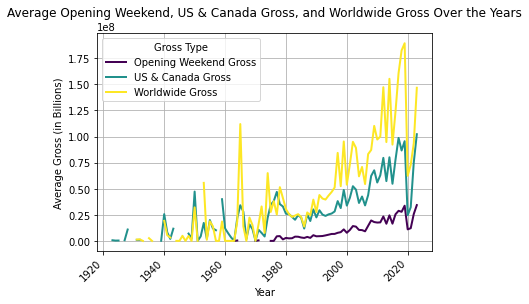

In [47]:
import matplotlib.pyplot as plt

# Extract the relevant columns for plotting
plot_data_by_year = df.groupby('Year')[['Opening Weekend Gross', 'US & Canada Gross', 'Worldwide Gross']].mean()

# Plotting
plt.figure(figsize=(10, 5))
plot_data_by_year.plot(kind='line', colormap='viridis', linewidth=2)
plt.title('Average Opening Weekend, US & Canada Gross, and Worldwide Gross Over the Years')
plt.ylabel('Average Gross (in Billions)')
plt.xlabel('Year')
plt.legend(title='Gross Type')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Save the plot to a file (in the current working directory)
plt.savefig('average_gross_over_years.png')
